In [7]:
# importando bibliotecas
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Definindo caminhos e URL
path_json = fr'C:\Users\user\Desktop\projeto_processamento\tests\data\dados.json'
path_excel = fr'C:\Users\user\Desktop\projeto_processamento\tests\data\dados.xlsx'

# Salvar os dados pivotados em um novo arquivo Excel
path_pivot_excel = fr'C:\Users\user\Desktop\projeto_processamento\tests\data\dados_pivot.xlsx'

# Link da API
url = ('https://apisidra.ibge.gov.br/values/t/8888/n3/all/v/all/p/last%201/c544/all/d/v11601%201,v11602%201,v11603%201,v11604%201,v12606%205,v12607%202')

In [45]:
# Realizando requisição GET para verificar o status da API e baixar os arquivos em JSON e Excel
response = requests.get(url, headers={'application': 'json'}, verify=False)

try:
    if response.status_code == 200:
        data = response.json()

        # Chaves selecionadas
        selected_keys = ['D1N', 'V', 'D2N', 'D3N', 'D4N']

        # Filtrar os dados
        filtered_data = [
            {key: entry[key] for key in selected_keys if key in entry}
            for entry in data
        ]

        # Salvar como JSON
        with open(path_json, 'w', encoding='utf-8') as json_file:
            json.dump(filtered_data, json_file, ensure_ascii=False)
        print(f'Arquivo JSON salvo em {path_json}')

        # Converter os dados filtrados em um DataFrame do pandas
        df = pd.DataFrame(filtered_data)

        # Salvar o DataFrame em um arquivo Excel
        df.to_excel(path_excel, index=False)
        print(f'Arquivo Excel salvo em {path_excel}')

except Exception as err:
    print(f'Falha ao acessar o site! Erro: {err}.')


C:\Users\user\Desktop\projeto_processamento\.venv\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apisidra.ibge.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Arquivo JSON salvo em C:\Users\user\Desktop\projeto_processamento\tests\data\dados.json
Arquivo Excel salvo em C:\Users\user\Desktop\projeto_processamento\tests\data\dados.xlsx


In [46]:
# Análise do dataframe
df.sample(3)

,D1N,V,D2N,D3N,D4N
1926,Paraná,-,PIMPF - Variação acumulada em 12 meses (em rel...,março 2024,3.15 Preparação de couros e fabricação de arte...
626,Ceará,9.7,PIMPF - Variação acumulada em 12 meses (em rel...,março 2024,3.11 Fabricação de bebidas
1840,Paraná,-,PIMPF - Variação mês/mês imediatamente anterio...,março 2024,3.10 Fabricação de produtos alimentícios


In [47]:
# Realizando abertura do arquivo EXCEL, pivotando as variaveis para colunas, alterando o tipo de dado e salvando em XLSX
import pandas as pd

path_excel = fr'C:\Users\user\Desktop\projeto_processamento\tests\data\dados.xlsx'

tipos_dados = {
    'Unidade da Federação': str,
    'Valor': float,
    'Variável': str,
    'Mês': str,
    'Seções e atividades industriais (CNAE 2.0)': str
}

choose_coluns = list(tipos_dados.keys())

# Adicionando skiprows para ignorar a primeira linha
df = pd.read_excel(path_excel, usecols=choose_coluns,
                   dtype=tipos_dados, na_values='-', skiprows=1)

df['Variável'] = df['Variável'].str.replace('PIMPF - ', '')

# Pivotar os dados
pivot_df = df.pivot_table(index=['Unidade da Federação', 'Mês', 'Seções e atividades industriais (CNAE 2.0)'],
                          columns='Variável',
                          values='Valor',
                          aggfunc='sum')

# Resetar o índice para tornar as colunas pivotadas em colunas normais
pivot_df = pivot_df.reset_index()


pivot_df.to_excel(path_pivot_excel, index=False, header=True)

print(f"Arquivo Excel com valores pivotados salvos em: '{path_pivot_excel}' com sucesso.")


Arquivo Excel com valores pivotados salvos em: 'C:\Users\user\Desktop\projeto_processamento\tests\data\dados_pivot.xlsx' com sucesso.


In [44]:
# Análise do dataframe exploratória do dataframe
df.sample(3)
# pivot_df.shape
# pivot_df.info(3)
# pivot_df.describe()

,Unidade da Federação,Valor,Variável,Mês,Seções e atividades industriais (CNAE 2.0)
2164,Rio Grande do Sul,NaN,"Variação mês/mês imediatamente anterior, com a...",março 2024,3.11 Fabricação de bebidas
1930,Paraná,-4.4,Variação acumulada em 12 meses (em relação ao ...,março 2024,3.20 Fabricação de produtos químicos
2067,Santa Catarina,11.1,Variação acumulada no ano (em relação ao mesmo...,março 2024,3.22 Fabricação de produtos de borracha e de m...


In [18]:
# Lendo o arquivo excel que foi pivotado
pivot_df = pd.read_excel(path_pivot_excel)


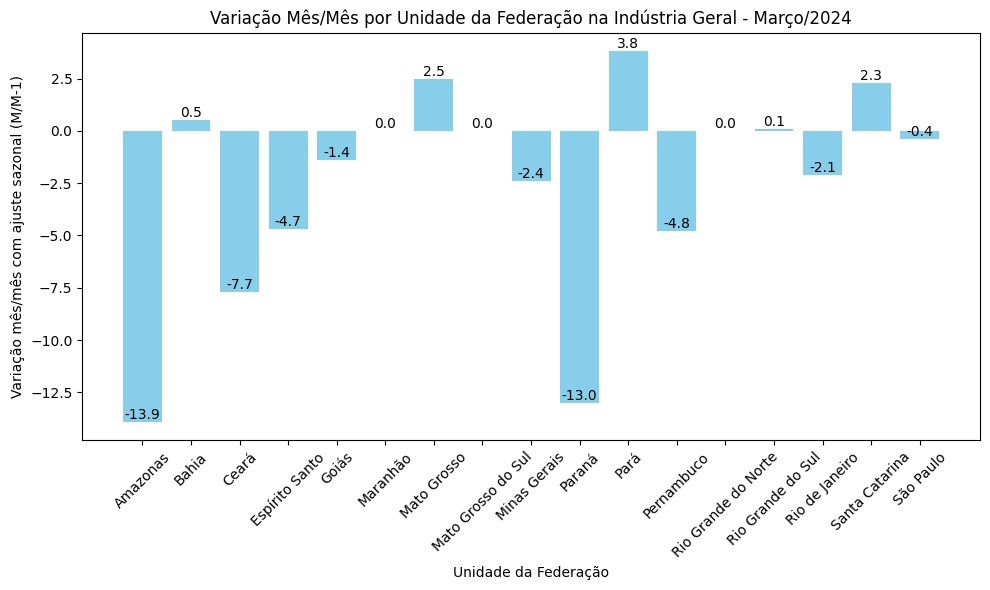

In [48]:
# Gerando gráficos com matplotlib, variação mês/mês dos estados com relação ao mês anterior
pivot_df_order = pivot_df.sort_values(by='Unidade da Federação', ascending=True)

# Filtrar o dataset pelo CNAE de indústria geral
pivot_df_filtrado = pivot_df_order[(pivot_df_order['Seções e atividades industriais (CNAE 2.0)'].str.contains('1 Indústria geral', case=False))]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_df_filtrado['Unidade da Federação'], pivot_df_filtrado['Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1)'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Unidade da Federação')
plt.ylabel('Variação mês/mês com ajuste sazonal (M/M-1)')
plt.title('Variação Mês/Mês por Unidade da Federação na Indústria Geral - Março/2024')

# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()  # Obtém a altura da barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

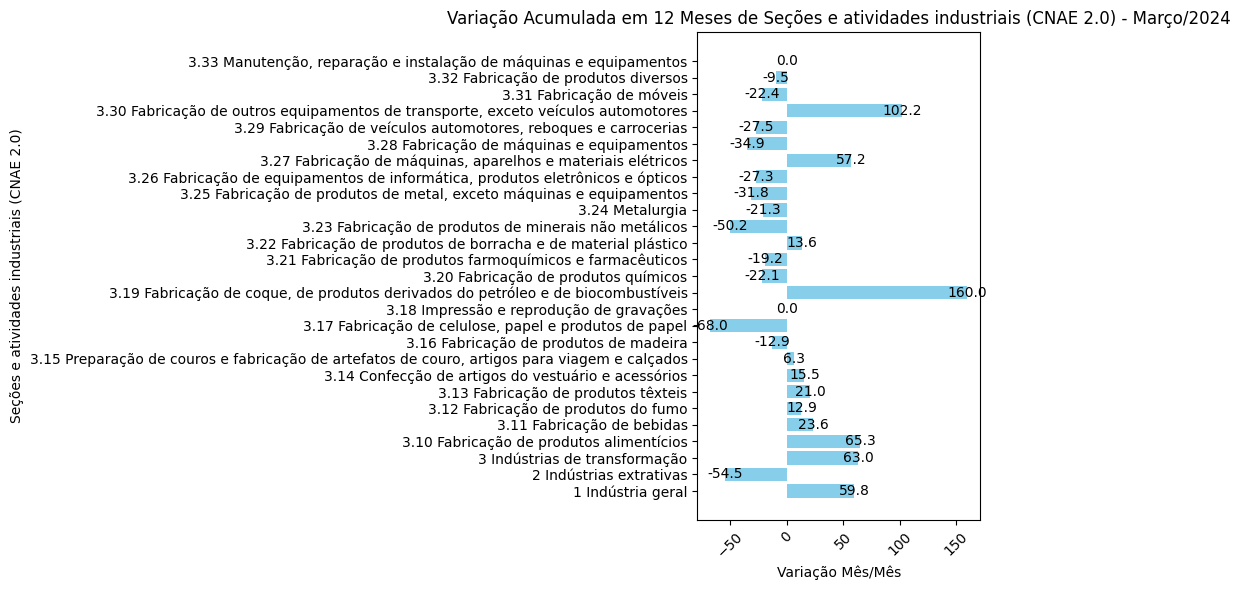

In [49]:
# Gerando gráficos com matplotlib, variação acumulada em 12 meses em relação ao periodo anterior das cnaes
pivot_df_order = pivot_df.sort_values(by='Seções e atividades industriais (CNAE 2.0)', ascending=False)
pivot_df_agrupado = pivot_df_order.groupby('Seções e atividades industriais (CNAE 2.0)')['Variação acumulada em 12 meses (em relação ao período anterior de 12 meses)'].sum().reset_index()


# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(pivot_df_agrupado['Seções e atividades industriais (CNAE 2.0)'], pivot_df_agrupado['Variação acumulada em 12 meses (em relação ao período anterior de 12 meses)'].round(2), color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Variação Mês/Mês')
plt.ylabel('Seções e atividades industriais (CNAE 2.0)')
plt.title('Variação Acumulada em 12 Meses de Seções e atividades industriais (CNAE 2.0) - Março/2024')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(bar.get_width() + 0.1,   # Posição x do texto
             bar.get_y() + bar.get_height() / 2,  # Posição y do texto
             f'{bar.get_width()}',    # Texto a ser exibido (o valor da barra)
             ha='center', va='center')  # Alinhamento do texto

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

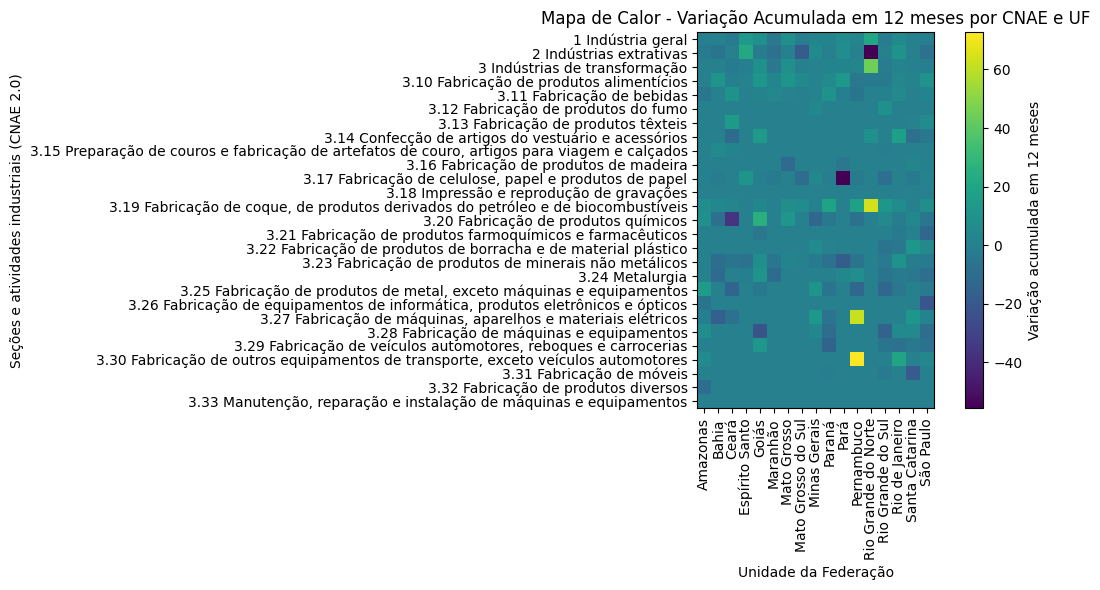

In [50]:
# Agrupando os valores por 'Seções e atividades industriais (CNAE 2.0)'
pivot_df_agrupado = pivot_df_order.groupby(['Seções e atividades industriais (CNAE 2.0)','Unidade da Federação'])['Variação acumulada em 12 meses (em relação ao período anterior de 12 meses)'].sum().reset_index()

# Pivotando os dados para o formato necessário para o heatmap
heatmap_data = pivot_df_agrupado.pivot_table(index='Seções e atividades industriais (CNAE 2.0)', columns='Unidade da Federação', values='Variação acumulada em 12 meses (em relação ao período anterior de 12 meses)')

# Criando a figura
plt.figure(figsize=(10, 6))

# Plotando o mapa de calor
heatmap = plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest')

# Adicionando a barra de cores
cbar = plt.colorbar(heatmap)
cbar.set_label('Variação acumulada em 12 meses')

# Adicionando rótulos e título
plt.xlabel('Unidade da Federação')
plt.ylabel('Seções e atividades industriais (CNAE 2.0)')
plt.title('Mapa de Calor - Variação Acumulada em 12 meses por CNAE e UF')

# Ajustando os ticks
plt.xticks(ticks=np.arange(heatmap_data.columns.size), labels=heatmap_data.columns, rotation=90)
plt.yticks(ticks=np.arange(heatmap_data.index.size), labels=heatmap_data.index)

# Adicionando anotações (valores) nas células
# for i in range(heatmap_data.shape[0]):
#     for j in range(heatmap_data.shape[1]):
#         value = heatmap_data.iloc[i, j]
#         if not np.isnan(value):
#             plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()
